In [57]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model
from sklearn.preprocessing import minmax_scale


def get_model():
    model = load_model("..\models\99.62\99.62.h5")
    model.load_weights("..\models\99.62\checkpoint.hdf5")

    return model

In [58]:
data = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU0AAAFNCAYAAACE8D3EAAAQDElEQVR4nO3dvW4USdsGYGZ6xrYWS2B2RQAykYUQEUJIK6QNEBK7hCSQcSQsEeFG7OkgToN8T4T+gk/mtY1/psb1X9clVQiarmfq7qe62z03Zir0vfQH4ByqwjzP843SH6AVFgwwz0KTFJxh6JjQBAggNIE2VLKDEZoAAYQmQAChCRBAaAIEEJrAlb5XchOmBkITIECe0HSWAjqh0wQIIDSBqtS+MRWaAAGEJkAAoQkQQGgCBBCaAAGEJlym9lu5ZCc0AQIITfqiMyQxoQkQQGgCBBCaAAGEJkAAoQkQQGjCiDxlsDWhCRBAaAIEEJoAAYQmQAChCRBAaAIEEJoAAYQmQAChCRBAaAIEEJoAAYQmQAChSZemaZoXi8V848aNrcZisSh9CFRKaNK86wakACWE0KQpt27dShqQApSrCM2O9fDKxNIhKTw5S2hSlVpD8qLBeFSd4loKyfPGNE2lp5CMhCZFHB0dNR+WJ4ft+ji2Ds3vXVwxI7flclk84FIO+qfKZNFTV3nVsF3vm9Akmd624CHDdr1fQpPoet+Chwz6o6pEM2pXKTjHoqJcm7C8fNiq90VosrWdnZ3igdTKoB+qyVZ0l2FDt9kPoUmQaZqKB9DpMCr/GTYdHkXqg9BkY7rL6w/ap4pcySNE8YZtevuEJpcqHTI9Dtqmgpyrl634YrHY+FpirmPWbbZNaHLKmzdvigddjoC8TI6bXW4KtUto8kNr3eVisZhv3bqVbD5Sf37apHLM89zGtcvUIXkeP9jGWUJzcOv1ungY1hSS50m5Xac9qjawWrfjy+Wy9NT8JFVw6jbbIzQHVVtgLhaL+ejoqPS0XCrVnNEWFRtQ6YBsudMSmqjYQGr6u/Eat+CbSNFt3r17t/RhEUBoDqKG7XgLW/BNjN5tj05oDqCGwHzz5k3paYgmRcdOO1SrYw8ePCgelr12UbFPRLRDtTpVw5uJenb37t2oc+W6Zjv6/mYPqvR2vNWbPKF05GMSmp0pGZajLXyd+ZhUqiMlA3PEt/a4rjkmlepEqS35aN3lSbGva9IGlepAqZs+Ozs7pQ+9uJjzOcq14NYJzcYdHh7qLgsyr+MRmo3LHZi6odNc1xyPKjUs93XMBw8elD7k6sR+Hyn1U6VG5QxM28bLxZzr9Xpd+nC4gtBsUM63FQnMq5nvsQjNBuUKzBGfvdyG65pjUaHG5ApMNhf7kS/qpkINyXEd0/ZwO0JzHCrUCIFZN6E5DhVqQI6f2XXX9npKhOb37wkPiAsJzQakDkyuTz3GoUKV02G2QWiOQ4Uqlvo6pmuY8QjNcahQxQRmO4TmOFSoUqm7zKu4yRBGaI5DhSpVMjAJpz7jUKEKpewy/WlkGkJzHCpUoVSB6TpmGl4PNxYVqkyqn64QmOl4YcdYVKgyqbpM0okZmk5u9bOaKpLqPZmHh4elD61rMWvl50TqJzQrkiIwLcL07AjGokqVSPFSDlu9PITmWFSpEim6TNLzAuLxqFIFnj17pstslJtA4xGaFUjxMPuzZ89KH9YQnOjGIzQrYGverpg185q+NlhdhaXoMi2+PFarlRPdgFSqMF1mu/wl0JhUqqAUXaYXcuTjZDcmlSpIl9m2mHVzE6gdVllBsQPTX//kE/v5zI8fP5Y+JDYkNAtJsTUnH9czx6VahcQOTNu7vNRuXNFD02/LXG13d1eX2bCPHz9GrZ3LKm2x2gqIvbXTqeRlaz42FStAl9k29RubimWW4kXD5GOXgBWXWexF53pYXrFPeKvVqvQhEUhoZqbLbJfHxJhnoZlV7Aeibe3yih2YQrNNqpZR7AXn78zzSdFlOum1SWhmpEtply6TYyqXibuu7dJlcpLQzCT2otvd3S19SMPQZXKS6mVi0bVJl8lZVl8mFl2bdJmcpYKZWHTtif2ImBNeH6zATIRme3SZnEcVM7Hw2pLiHQG6zD5YgZkIzbboMrmISmZi8bXjl19+0WVyISswE6HZjlSPGXmjUR+swEyEZjtSbM1PDq/za5sVmInQbEOKLtN2vS9WYCZCsw05AlNwts0KzERo1i9Xl3ly2Kq3xwrMJOZC+/LlS+nD6c6///6bPTCdBNukYpnoTupWostUzzYJzUxiLjLXwuJar9fFAlM92yM0M4ndyRBPycBUz/aoViY7OzsWWYVSvMlIPfumWhnFXGR+VC2O0mEpNNujWhnFXGSug/3Pt2/f5s+fP89//vnnfPfu3fnOnTvzb7/9Nv/+++/zP//8c+G/K3nzRy3bJTQzcl0zrm/fvs3Pnz/fKJQODw/nv//+e57nesLyePib9LZYeRnFfkfjyB3K58+fq7ke6eQ3FhXLTKdyfZ8/fy4edLGGZzTbIzQzS7X4Ruk6v3371k2HOUrNeiM0M0t9Pa33hfjXX38VDzt1GpvQzCxXl9Tjokzxuz0Ck1BCM7MvX75kX6CtXTe7ffv2vFwu58ViUd2d7uuO1mrBz4RmAaUX7nEYrdfrYnOwWq1+BGPp+cg1dnd3i8038QjNAkov3k0C9Xgsl8t5mqZ5b2/v0mPa29ubp2k61SH22CluO+iHahYgSMYZrl/2R2gWEPvlHUZ9Q1j2S2gWUnpRG8KS7QjNQnp5QNsQlqMRmoWVXuyjjsVCWLIdoVkBN4baHm/fvi39FSIjoVmJ1WpVfPEb24/79++X/gqRidCsjK6z3bGzs1P660MGQrNCbhK1PeibCles9OI3th+vXr0q/fUhEaFZOdv1doftep+EZiOEZ7uDvqhoY4Rnm4N+qGajhGd7gz6oZOOEZ1uD9qliJ4RnO4O2qWCn1ut18y8BPn4J8mq1avo4BGdfVG8wNf3ExMm3w9++ffvCz3x0dFT8s8Ye0zRlrDoxCU1O2fZnK7b9mYxNpA6w4x87293dzRqcT58+vfbckJ/QpGq5fyf+/v37WYOT9qga1Uq9Lb/oXZhv374VnFxIxahWybD677//soWm30Jvi9CkSqm35ZvKFZyPHz9OOJvEJDSJ4nvE/yv1tvzXX38N+jx7e3tZgpM2qBTVqXEr/OrVK8HJPM9Ck8qk3JbH+BG01KHp+mb9hCbVSLktj/mrkbrNsakQ1WgpiFJ+Vj8LXDehmcj3mHdGBpByW350dJTkM6cMzocPHyb5zFyf0KS4Vrbl52mpOyYOlaG4loPn6dOnyT67m0J1EpoU1eK2/KxpmpoNfcKpCsW0vC0/K9VxrFarrMexidEv1wtNikkVNKU6tJ6OhYupCEX0sC0/6/Hjx0mO5/Xr10WOh/MJTbLraVt+VoqTQelj4jShSXapArOWrWyvx8X/Uw2y6nFbftbDhw91mx0bKjRHv+tXWs/b8rNSnByog0qQTe/b8rN6PzGMqs5vG90ZYVt+lm6zT6pAFqNsy096/fr1UMc7CqFJcim7zNqNeMy9UwGSG21bflKKv0vXbZYlNEkqVZfZUnDoNvti9knmw4cPw27LT/JXQn1p69tHU1J1mS1sy88a/cTREzNPEgcHB8Nvy0/SbfZDaJKEbfnPzEcfzDrRrVYr2/Jz6Db7IDSJzrb8YrrN9plxokr1ezm98KeV7TPjRKXLvJrQbJsZJ5rlcqnL3EDsbpO8zDjR6DI3F3OO7t27V/pwhiI0iSLVg+y9ijlfvZ5YatXvt5KsUgTmcrksfVjJCM12CU2uTZcZ7t69e+aqUWaba0sRmNM0lT6s5IRmm8w216LL3J75apPZ5lpSBOZqtSp9WFkIzTaZbbamy7yemHP28uXL0oczjHG+oUSV6s8lDw4OSh9aNjFPOjs7O6UPZxhCk62kCMzRHp3x2FGbhCbBUm3LP3z4UPrQstrZ2RGaDRKaBNNlxvHy5cuoc0geZpogbv7EZQ7bY6bZWKqbPyN2mceEZnvMNBtLEZijL3bz2B4zzUZSbctH7jLnWWi2yEyzEV1mGuayPWaaK6XqMkd4KcdVhGZ7zDSXcvMnLaHZHjPNpWzL0zKn7THTXMjNn/SEZnvMNBfSZaZnXttjpjmXmz95CM32mGnOZVueh9Bsj5nmJ/6+PB/z2x4zzU90mfkIzfaYaU5ZLpe6zIzMcXvMNKekCEw3fy4mNNtjpvlhtVrZlmcmNNtjpvnBtjyvT58+mesGmWnmeZ7nJ0+e6DIzu3nzprlukNBknuc0jxlxOb9G2SbfbOZ5jr81t4ivJjTbJDRJ0mU+efKk9GFVL+a837x5s/ThDENoEj0wbc03E3O+P336VPpwhuHbPbgUXeZqtSp9WE1wkmqT2R6cLrOM/f19c94osz2w9XodPTCXy2Xpw2pC7A6ffMz2wDxmVI55b5fZHljsheuxl82Z93YJzUHpMsuxNW+bGR+ULrMcJ6u2mfEBpbgBxGZid5lOVvn5tg/Iwi0n9slqf3+/9CENR2gOKPbCXa/XpQ+pCbHnXYdfhlkfjBtAZaQITHNfhlkfTOxFa2t+uXfv3iULTHNfhtAcjE4nn1Q/hWzuyzLzg9HppJeyuzT35QnNwcRcuG4A/Sx1d6nLLM/sD2SaJgs3oRxhqcsszzd/IH5eIY1pucwWmE5W5anAQIRmfLm24+a9HkJzIDEX7zRNpQ+nqDt37mQNS11mPVRhIBZvHLm7S11mXcb+9g9GaF5PqbAcec5rpBIDsYC3UzosR5vv2qnGQCziMDWE5Shz3RIVGYiFfLVl5seHRp3nlqnKQCzm8x0cHFTTVfY6xz1RmYFY0P/z9evXKoOyl/ntmeoMxKKu5zrlRcNjRfVr99tPsJiL+9GjR6UPZ2O1B+XxePfuXempYgNCcyAxF/hyuSx9OJdqJSh1l+0RmgPp/W/PWwpK3WW7hOZAYj9OU9qLFy+aDMpaTzpspvw3n2wePXrU9MJvOSRPjjt37mSdN+ISmoOJHQAp33bUS0iWOsmQhtAcTIowiBWc+/v7XYXkyVH7jTM2JzQHk7OrOh7L5XJer9fz+/fvT32W5XLZbUieHPRFRQczQkjVMmzH+yQ0B1Q6THofwrJvQnNAuk1hyfaE5qBKB0xPQ1iORWgOSrcpLNmO0BxY6dBpdQjLsQnNgek2w4Ly69evpUtGBYTm4EqHUc1jsVjMBwcHpUtEZYQmxcOptuGvd7iM0GSepql4UJUerlOyKaHJPM9jXt8UlGxDaPJD6RATlLRAaHJK6VATlNROaPKTHrbqgpJUhCbnev78efHgCw3JFy9elJ42BiA0uVStXaeQpBShyZX++OOP4uEpJKmF0GQr0zQlC9Ljt71DjYQm0b1//35er9c/fs7ieFwWkvv7+6U/NmxEaAIEEJq1+176AwAnCU2AAEITIIDQBAggNAECCE2AAEITIIDQBAggNAECCE2AAEITIIDQBAggNAECCE2AAEITIIDQBAggNAECCE2AAEITIIDQhAy++9mSbghNgABCEyCA0AQIIDQBAghNgABCEyCA0AQIIDQBAghNgABCEyCA0AQIIDQBAghNgABCEyCA0AQIIDQBAghNgABCEyCA0AQI8H+dQoGF2hZZzgAAAABJRU5ErkJggg=="

def img_preproc(data):
    img = Image.open(urllib.request.urlopen(data))
    img = np.invert(np.array([np.array(
        ImageOps.grayscale(
            img.resize((28, 28))
        ).getdata())
    ]).reshape(28,28))/255

    return minmax_scale(img)

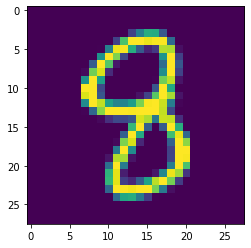

In [59]:
plt.imshow(img_preproc(data))

In [60]:
np.argmax(model.predict(img_preproc(data).reshape(1, 28*28)), axis=1)

array([8], dtype=int64)